# DATA WRANGLING API COVID


Referencia: https://pypi.org/project/covid-data-api/

En función a la documentación de referencia se trabajó con los datos de Covid para generar información que pueda ser de relevancia.

In [5]:
import json
import pandas as pd
import numpy as np

In [6]:
from covid.api import CovId19Data
api = CovId19Data(force=False)

In [7]:
pip install covid-data-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
res = api.get_stats()

In [9]:
# Vemos la info total
res

{'confirmed': 676570149,
 'recovered': 0,
 'deaths': 6881802,
 'last_updated': '2023-03-09 00:00:00'}

In [10]:
# Filtramos usando la Key Argentina
res = api.filter_by_country("argentina")

In [11]:
# Vemos los datos totales de Argentina
res

{'confirmed': 10044957,
 'label': 'Argentina',
 'last_updated': '2023-03-09 00:00:00',
 'lat': '-38.4161',
 'long': '-63.6167',
 'recovered': 0,
 'deaths': 130472}

In [12]:
# Consultamos los resultados por pais
res = api.get_all_records_by_country()


In [13]:
# Generarmos en Dataset
covid = pd.DataFrame(res)

In [14]:
# Vemos el index
covid.index

Index(['confirmed', 'label', 'last_updated', 'lat', 'long', 'recovered',
       'deaths'],
      dtype='object')

In [15]:
#Transponemos
covid = covid.T 

In [27]:
#Mostramos el Dataset
covid

,confirmed,label,last_updated,lat,long,recovered,deaths
afghanistan,209451,Afghanistan,2023-03-09 00:00:00,33.93911,67.709953,0,7896
albania,334457,Albania,2023-03-09 00:00:00,41.1533,20.1683,0,3598
algeria,271496,Algeria,2023-03-09 00:00:00,28.0339,1.6596,0,6881
andorra,47890,Andorra,2023-03-09 00:00:00,42.5063,1.5218,0,165
angola,105288,Angola,2023-03-09 00:00:00,-11.2027,17.8739,0,1933
...,...,...,...,...,...,...,...
west_bank_and_gaza,703228,West Bank and Gaza,2023-03-09 00:00:00,31.9522,35.2332,0,5708
winter_olympics_2022,535,Winter Olympics 2022,2023-03-09 00:00:00,39.9042,116.4074,0,0
yemen,11945,Yemen,2023-03-09 00:00:00,15.552727,48.516388,0,2159
zambia,343135,Zambia,2023-03-09 00:00:00,-13.133897,27.849332,0,4057


In [33]:
# Consultamos el dataset por Ciudades/Provincias
provincias = api.get_all_records_by_provinces()

In [35]:
# Generamos el Dataset
covid_prov = pd.DataFrame(provincias)

In [36]:
# Transponemos
covid_prov = covid_prov.T

In [37]:
# Mostramos el dataset
covid_prov

,confirmed,label,country,lat,long,last_updated,recovered,deaths
australian_capital_territory,232974,Australian Capital Territory,Australia,-35.4735,149.0124,2023-03-09 00:00:00,0,228
new_south_wales,3915992,New South Wales,Australia,-33.8688,151.2093,2023-03-09 00:00:00,0,6529
northern_territory,105111,Northern Territory,Australia,-12.4634,130.8456,2023-03-09 00:00:00,0,91
queensland,1800236,Queensland,Australia,-27.4698,153.0251,2023-03-09 00:00:00,0,2783
south_australia,883620,South Australia,Australia,-34.9285,138.6007,2023-03-09 00:00:00,0,1365
...,...,...,...,...,...,...,...,...
jersey,66391,Jersey,United Kingdom,49.2138,-2.1358,2023-03-09 00:00:00,0,161
montserrat,1403,Montserrat,United Kingdom,16.742498,-62.187366,2023-03-09 00:00:00,0,8
pitcairn_islands,4,Pitcairn Islands,United Kingdom,-24.3768,-128.3242,2023-03-09 00:00:00,0,0
saint_helena_ascension_and_tristan_da_cunha,2166,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.9467,-14.3559,2023-03-09 00:00:00,0,0


In [38]:
# Contamos cuantas ciudades por pais tiene cargado el dataset usando .value_counts()
covid_prov_resumen=covid_prov['country'].value_counts()

In [39]:
# Ordenamos el dataset en forma ascendente
covid_prov_resumen.sort_values()

Denmark            2
New Zealand        2
Netherlands        4
Australia          8
France            11
United Kingdom    14
Canada            16
China             34
Name: country, dtype: int64

In [40]:
# Consultamos los primeros 10 paises de la lista
paises = api.show_available_countries()
paises[0:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia']

In [41]:
# Consultamos la cantidad total de paises
len(paises)

201

In [42]:
# Consultamos el historial de Argentina
arg = api.get_history_by_country('argentina')

# Convertimos con dumps
arg_tx=json.dumps(arg)

# Convertirmos en json
arg_json=json.loads(arg_tx)

# Verificamos la Key
arg_json.keys()

dict_keys(['argentina'])

In [43]:
# Consultamos las subclaves 
for clave in arg_json.keys():
    print(f"Clave: {clave}")
    valor = arg_json[clave]

    if isinstance(valor, dict):
        print("Subclaves:")
        for subclave in valor.keys():
            print(f"- {subclave}")

Clave: argentina
Subclaves:
- label
- lat
- long
- history


In [44]:
# Consultamos la Subclave History, que es la que contiene los datos que nos interesan
arg_evo = arg_json['argentina']['history']

In [45]:
# Generamos el dataset con la información histórica.
arg_df =pd.DataFrame.from_dict(arg_evo)

#Transponemos
arg_df=arg_df.T

# Mostramos el Dataset de Argentina
arg_df


,confirmed,change_confirmed,recovered,change_recovered,deaths,change_deaths
2020-01-22 00:00:00,0,na,0,na,0,na
2020-01-23 00:00:00,0,na,0,na,0,na
2020-01-24 00:00:00,0,na,0,na,0,na
2020-01-25 00:00:00,0,na,0,na,0,na
2020-01-26 00:00:00,0,na,0,na,0,na
...,...,...,...,...,...,...
2023-03-05 00:00:00,10044125,0.0,0,na,130463,0.0
2023-03-06 00:00:00,10044957,8.283449280051772e-05,0,na,130472,6.898507622850923e-05
2023-03-07 00:00:00,10044957,0.0,0,na,130472,0.0
2023-03-08 00:00:00,10044957,0.0,0,na,130472,0.0


In [46]:
# Repetimos los pasos para objetener la información histórica de China

china = api.get_history_by_country('china')
china_tx=json.dumps(china)
china_json=json.loads(china_tx)


In [48]:
# Consultamos la Subclave History, que es la que contiene los datos que nos interesan

china_evo = china_json['china']['history']

In [49]:
# Generamos el Dataset, transponemos y lo mostramos.

china_df =pd.DataFrame.from_dict(china_evo)
china_df=china_df.T
china_df

,confirmed,change_confirmed,recovered,change_recovered,deaths,change_deaths
2020-01-22 00:00:00,548,na,28,na,17,na
2020-01-23 00:00:00,643,1.7,30,na,18,na
2020-01-24 00:00:00,920,0.5925925925925926,36,na,26,na
2020-01-25 00:00:00,1406,0.4418604651162791,39,0.0,42,na
2020-01-26 00:00:00,2075,0.6774193548387096,49,0.0,56,na
...,...,...,...,...,...,...
2023-03-05 00:00:00,4903524,0.0,0,na,101054,0.0
2023-03-06 00:00:00,4903524,0.0,0,na,101055,0.0
2023-03-07 00:00:00,4903524,0.0,0,na,101055,0.0
2023-03-08 00:00:00,4903524,0.0,0,na,101055,0.0


In [50]:
# Generamos el nombre del pais
arg_df['nombre_pais'] = 'Argentina'
china_df['nombre_pais'] = 'China'

# Unimos los dos Dataset
arg_china_df = pd.concat([arg_df, china_df])

#Mostramos el Dataset con los casos de Argentina y China
arg_china_df

,confirmed,change_confirmed,recovered,change_recovered,deaths,change_deaths,nombre_pais
2020-01-22 00:00:00,0,na,0,na,0,na,Argentina
2020-01-23 00:00:00,0,na,0,na,0,na,Argentina
2020-01-24 00:00:00,0,na,0,na,0,na,Argentina
2020-01-25 00:00:00,0,na,0,na,0,na,Argentina
2020-01-26 00:00:00,0,na,0,na,0,na,Argentina
...,...,...,...,...,...,...,...
2023-03-05 00:00:00,4903524,0.0,0,na,101054,0.0,China
2023-03-06 00:00:00,4903524,0.0,0,na,101055,0.0,China
2023-03-07 00:00:00,4903524,0.0,0,na,101055,0.0,China
2023-03-08 00:00:00,4903524,0.0,0,na,101055,0.0,China


In [54]:
# reseteamos el index para convertirlo en una columna
arg_china_df = arg_china_df.reset_index()


In [55]:
# Revisamos el tipo de dato
arg_china_df['level_0'].dtypes

dtype('int64')

In [56]:
# Cambiamos el tipo de columna usando .astype
arg_china_df['level_0'] = arg_china_df['level_0'].astype(str)


In [57]:
# Vemos resultados para verificar el cambio a objeto.
arg_china_df.dtypes

level_0             object
index               object
confirmed           object
change_confirmed    object
recovered           object
change_recovered    object
deaths              object
change_deaths       object
nombre_pais         object
dtype: object

In [58]:
# pívoteamos para poder comparar visualmente los casos confirmados y los muertos de argentinta y china segun la fecha
arg_china_df.pivot(index= 'index', columns='nombre_pais', values= ['confirmed' , 'deaths'])


confirmed             deaths        
nombre_pais         Argentina    China Argentina   China
index                                                   
2020-01-22 00:00:00         0      548         0      17
2020-01-23 00:00:00         0      643         0      18
2020-01-24 00:00:00         0      920         0      26
2020-01-25 00:00:00         0     1406         0      42
2020-01-26 00:00:00         0     2075         0      56
...                       ...      ...       ...     ...
2023-03-05 00:00:00  10044125  4903524    130463  101054
2023-03-06 00:00:00  10044957  4903524    130472  101055
2023-03-07 00:00:00  10044957  4903524    130472  101055
2023-03-08 00:00:00  10044957  4903524    130472  101055
2023-03-09 00:00:00  10044957  4903524    130472  101056

[1143 rows x 4 columns]

In [59]:
# Filtramos por Pais.
covid_prov.head()
covid_prov_australia=covid_prov[covid_prov['country']=="Australia"]
covid_prov_australia

,confirmed,label,country,lat,long,last_updated,recovered,deaths
australian_capital_territory,232974,Australian Capital Territory,Australia,-35.4735,149.0124,2023-03-09 00:00:00,0,228
new_south_wales,3915992,New South Wales,Australia,-33.8688,151.2093,2023-03-09 00:00:00,0,6529
northern_territory,105111,Northern Territory,Australia,-12.4634,130.8456,2023-03-09 00:00:00,0,91
queensland,1800236,Queensland,Australia,-27.4698,153.0251,2023-03-09 00:00:00,0,2783
south_australia,883620,South Australia,Australia,-34.9285,138.6007,2023-03-09 00:00:00,0,1365
tasmania,287507,Tasmania,Australia,-42.8821,147.3272,2023-03-09 00:00:00,0,256
victoria,2880559,Victoria,Australia,-37.8136,144.9631,2023-03-09 00:00:00,0,7370
western_australia,1293461,Western Australia,Australia,-31.9505,115.8605,2023-03-09 00:00:00,0,952


In [60]:
# Agrupamos el dataframe para ver el promedio de fallecitos por pais.
grouped = covid_prov['deaths'].groupby(covid_prov['country'])
grouped.mean()


country
Australia         2446.750000
Canada            3232.500000
China             2972.235294
Denmark             24.500000
France             424.000000
Netherlands        178.750000
New Zealand          1.000000
United Kingdom      55.214286
Name: deaths, dtype: float64

In [61]:
# Agrupamos el dataframe para ver la cantidad de fallecitos por pais.
grouped = covid_prov['deaths'].groupby(covid_prov['country'])
grouped.sum()

country
Australia          19574
Canada             51720
China             101056
Denmark               49
France              4664
Netherlands          715
New Zealand            2
United Kingdom       773
Name: deaths, dtype: object

In [62]:
# Agrupamos el dataframe para ver la cantidad de fallecitos y confirmados por pais.
covid_conf_death = covid_prov.groupby('country').agg({'confirmed': 'sum', 'deaths':'sum'})
print(covid_conf_death)

               confirmed  deaths
country                         
Australia       11399460   19574
Canada           4617095   51720
China            4903524  101056
Denmark            46629      49
France           1248209    4664
Netherlands       112854     715
New Zealand         7823       2
United Kingdom    233396     773


In [63]:
# Definimos una fucnción para generar la columna que represente "cada 100 casos confirmados"
def ratio(x):
  return x/100

In [64]:
# Usando Apply aplicamos la función definida a la columna confirmed
covid_conf_death['confirmed100']=covid_conf_death['confirmed'].apply(ratio)

In [65]:
# mostramos los resultados
print(covid_conf_death)

               confirmed  deaths  confirmed100
country                                       
Australia       11399460   19574     113994.60
Canada           4617095   51720      46170.95
China            4903524  101056      49035.24
Denmark            46629      49        466.29
France           1248209    4664      12482.09
Netherlands       112854     715       1128.54
New Zealand         7823       2         78.23
United Kingdom    233396     773       2333.96


In [66]:
# Generamos una nueva columna que muestre la cantidad de fallecidos cada 100 casos confirmados.
covid_conf_death['ratio']=covid_conf_death['deaths'] / covid_conf_death['confirmed100']

In [67]:
# Mostramos los resultados
print(covid_conf_death)

               confirmed  deaths  confirmed100     ratio
country                                                 
Australia       11399460   19574     113994.60   0.17171
Canada           4617095   51720      46170.95  1.120185
China            4903524  101056      49035.24  2.060885
Denmark            46629      49        466.29  0.105085
France           1248209    4664      12482.09  0.373655
Netherlands       112854     715       1128.54  0.633562
New Zealand         7823       2         78.23  0.025566
United Kingdom    233396     773       2333.96  0.331197


In [68]:
# Genereamos el DataFrame
covid_conf_death_df=pd.DataFrame(covid_conf_death)


In [69]:
# Reseteamos el index para convertirlo en una columna
covid_conf_death_df=covid_conf_death_df.reset_index()

In [70]:
covid_conf_death_df

,country,confirmed,deaths,confirmed100,ratio
0,Australia,11399460,19574,113994.60,0.17171
1,Canada,4617095,51720,46170.95,1.120185
2,China,4903524,101056,49035.24,2.060885
3,Denmark,46629,49,466.29,0.105085
4,France,1248209,4664,12482.09,0.373655
5,Netherlands,112854,715,1128.54,0.633562
6,New Zealand,7823,2,78.23,0.025566
7,United Kingdom,233396,773,2333.96,0.331197


In [71]:
# Usando Melt genramos una vista apilando por pais las variables y sus valores.
covid_conf_death_df.melt(id_vars=['country'])

,country,variable,value
0,Australia,confirmed,11399460
1,Canada,confirmed,4617095
2,China,confirmed,4903524
3,Denmark,confirmed,46629
4,France,confirmed,1248209
5,Netherlands,confirmed,112854
6,New Zealand,confirmed,7823
7,United Kingdom,confirmed,233396
8,Australia,deaths,19574
9,Canada,deaths,51720


# DATA WRANGLING DATASET 


In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 


In [73]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
%cd '/content/gdrive/MyDrive/DS'
dsM = pd.read_csv('dataset_04.csv',sep=',') #Importo
dsM.dropna(subset=['Men_Leave'], inplace=True) #Me quedo con los Masculinos sin NaN

/content/gdrive/MyDrive/DS


In [81]:
%cd '/content/gdrive/MyDrive/DS'
dsF = pd.read_csv('dataset_04.csv',sep=',') #importo
dsF = dsF[(dsF.Gender == "F")] #Me quedo con los Femeninos, que están todos ok.

ds1 = pd.merge(dsM, dsF, how='outer') # Hago un merge para unir los Masculinos y los Femeninos en un dataset final.

/content/gdrive/MyDrive/DS


In [82]:
 # Mostramos los resultados
ds1.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
2,9,AUBREY,Finance,Japan,Director,NaN,0,NaN,3,6,...,5,1,5,2,3,3,2,1974,64,7
3,11,AHEARN,IT,China,Senior Manager,NaN,0,1.0,3,6,...,4,5,2,1,4,5,4,2121,80,10
4,13,ZUMWALT,Operations,UK,Senior Manager,NaN,0,1.0,3,6,...,4,5,2,1,4,5,2,3056,76,9


<Axes: >

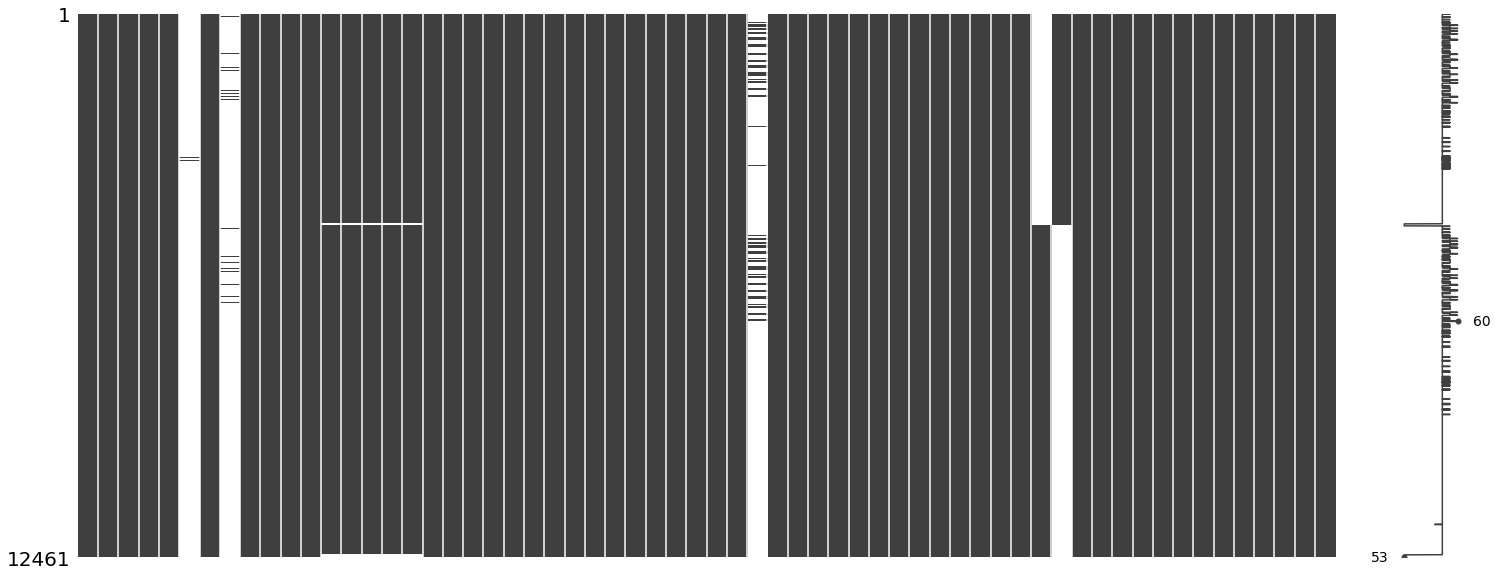

In [83]:
# Generamos la matriz para ver registros missing
import missingno as msno
msno.matrix(ds1)

In [84]:
# Elimino los campos "Rissing Star" y "CSR Factor" dado que en la mayoria de los registros están vacíos.
ds1.drop('Rising_Star', axis= 1, inplace=True)
ds1.drop('CSR Factor', axis= 1, inplace=True)
ds1


,ID,Name,Department,GEO,Role,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,0,1.0,3,6,6,...,2,2,2,2,2,1,5,1841,61,9
1,4,BENT,Human Resources,China,Senior Director,0,NaN,3,6,6,...,5,1,1,2,4,4,1,3248,77,6
2,9,AUBREY,Finance,Japan,Director,0,NaN,3,6,6,...,5,1,5,2,3,3,2,1974,64,7
3,11,AHEARN,IT,China,Senior Manager,0,1.0,3,6,6,...,4,5,2,1,4,5,4,2121,80,10
4,13,ZUMWALT,Operations,UK,Senior Manager,0,1.0,3,6,6,...,4,5,2,1,4,5,2,3056,76,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,14994,FOOTE,Warehouse,UK,Level 2-4,1,NaN,3,6,6,...,1,1,5,2,5,1,4,1150,90,2
12457,14995,EARLY,Operations,Korea,Level 2-4,1,NaN,3,6,6,...,3,2,4,2,2,3,1,1538,88,9
12458,14996,LUNSFORD,Sales,Australia,Level 2-4,1,NaN,3,6,6,...,4,4,3,1,4,5,5,1247,89,4
12459,14997,GOLDSMITH,Finance,China,Level 2-4,0,NaN,3,6,6,...,2,4,4,2,3,4,5,1155,88,2


In [85]:
# Analizamos el campo critical.
distrib_critical=ds1['Critical'].value_counts()
distrib_critical

1.0    476
Name: Critical, dtype: int64

<Axes: >

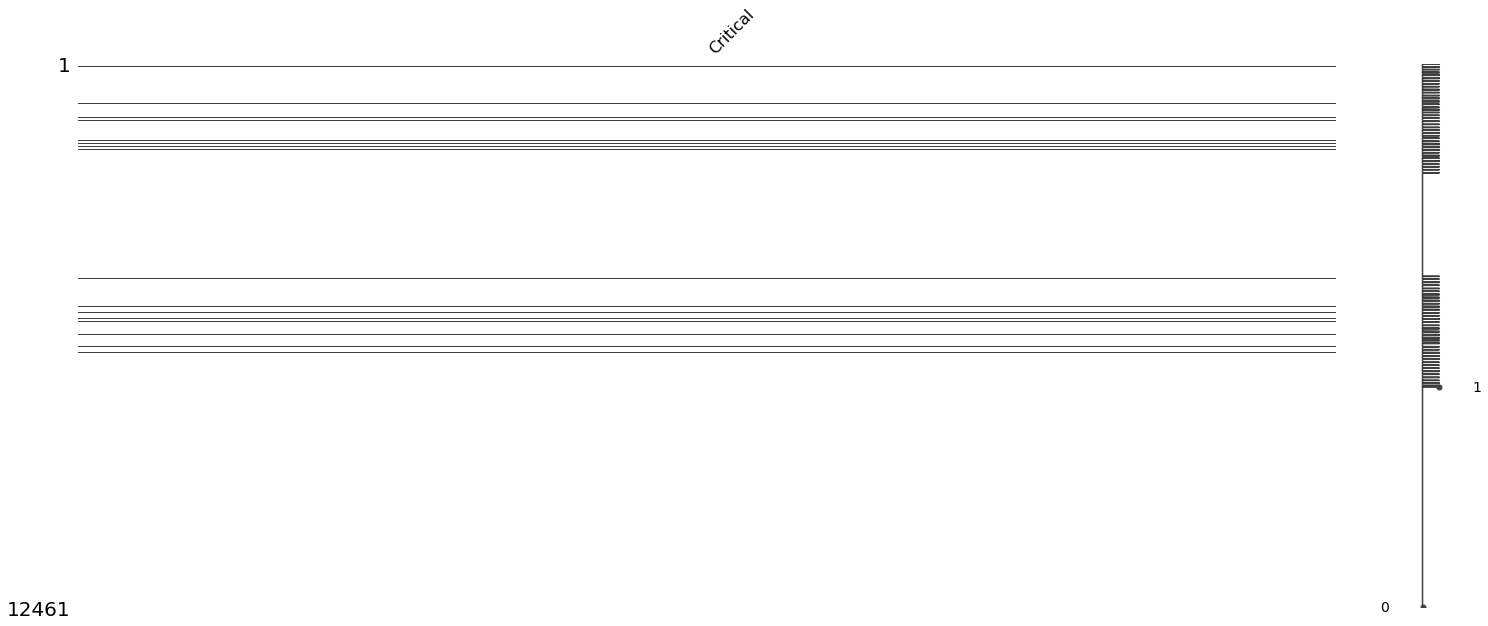

In [86]:
# Generamos la matriz missing del campo "Critical"
msno.matrix(ds1[['Critical']])

In [87]:
# Remplazamos los vacios en Critical, considerando que si no estan identificados como critícos no lo son.
ds1['Critical'].fillna(0, inplace=True)

<Axes: >

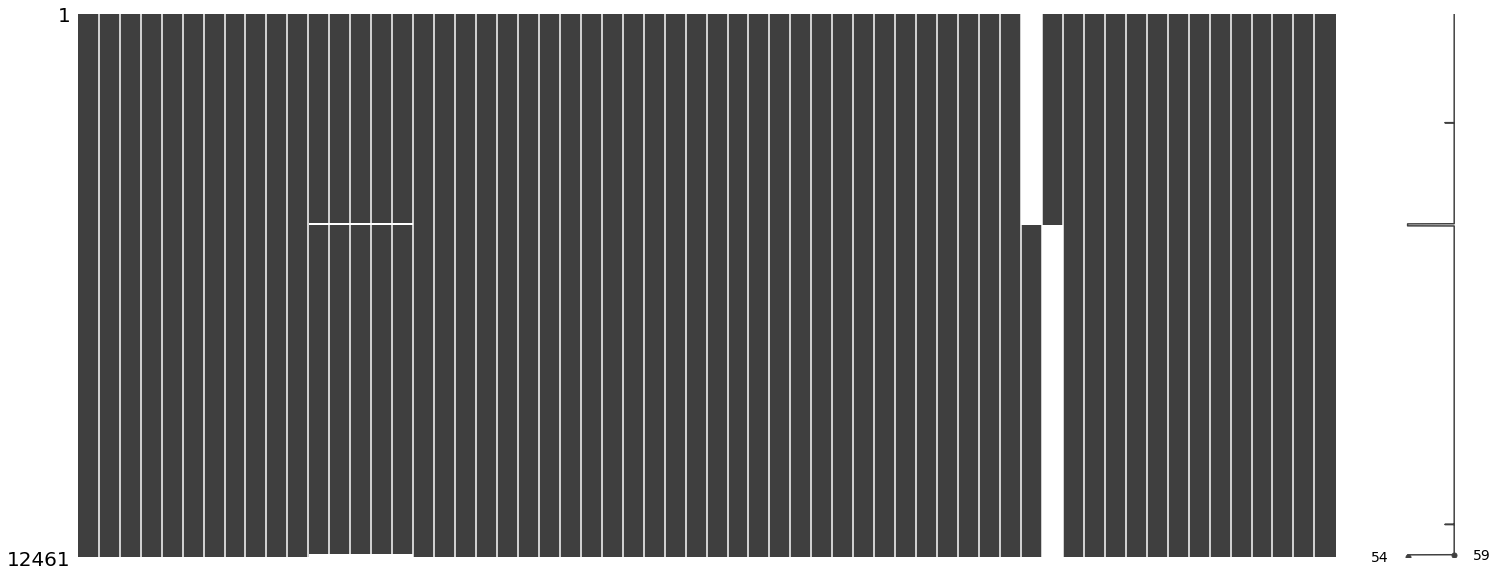

In [88]:
# Verificamos resultados en la matriz
msno.matrix(ds1)

In [89]:
# Revisamos la antidad de registros del campo 'EMP_Sat_OnPrem_1
distrib_sat=ds1['EMP_Sat_OnPrem_1'].value_counts()
distrib_sat

3.0    12355
Name: EMP_Sat_OnPrem_1, dtype: int64

In [90]:
# Eliminamos los registros en los que 'EMP_Sat_OnPrem_1' está vacío.
ds1.dropna(subset=['EMP_Sat_OnPrem_1'], inplace=True)

<Axes: >

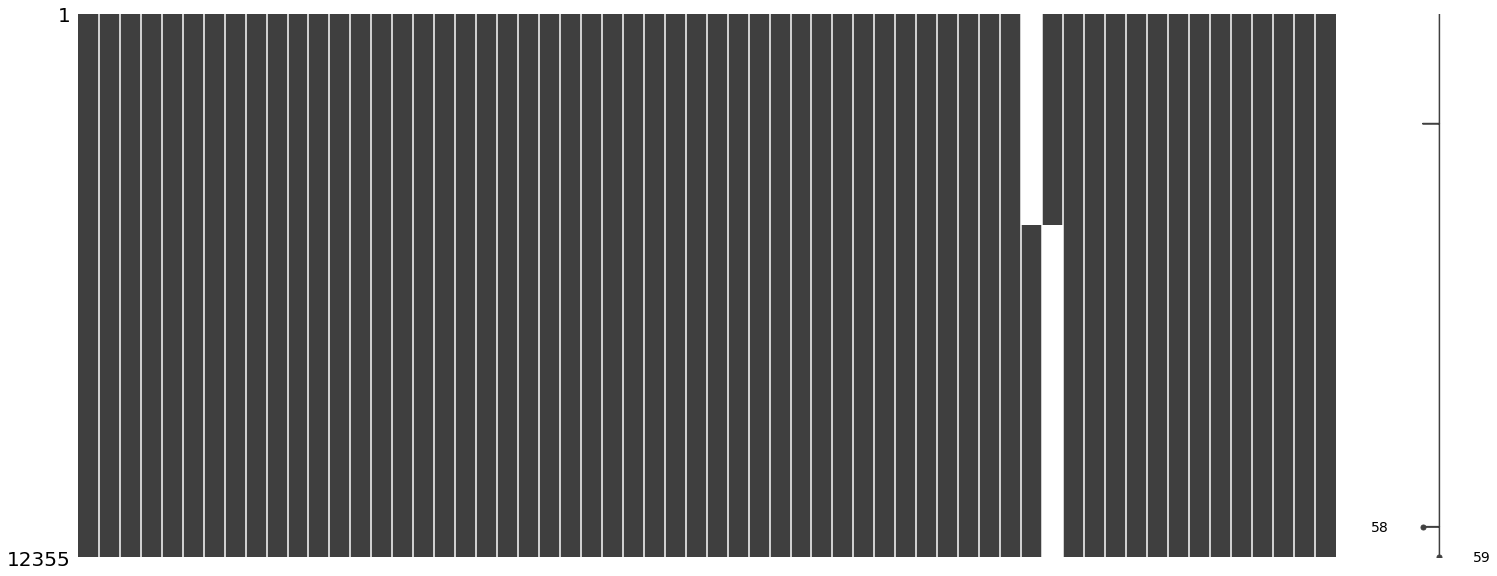

In [91]:
# Revisamos nuevamente la matriz
msno.matrix(ds1)

In [92]:
# Revisamos los vacios para descartar que se no lo estemos viendo algo en la matriz visual
ds1.isna().sum()

ID                                          0
Name                                        2
Department                                  0
GEO                                         0
Role                                        0
Will_Relocate                               0
Critical                                    0
Trending Perf                               0
Talent_Level                                0
Validated_Talent_Level                      0
Percent_Remote                              0
EMP_Sat_OnPrem_1                            0
EMP_Sat_OnPrem_2                            0
EMP_Sat_OnPrem_3                            0
EMP_Sat_OnPrem_4                            0
EMP_Sat_OnPrem_5                            0
EMP_Sat_Remote_1                            0
EMP_Sat_Remote_2                            0
EMP_Sat_Remote_3                            0
EMP_Sat_Remote_4                            0
EMP_Sat_Remote_5                            0
EMP_Engagement_1                  

In [93]:
# Revisamos las estadísticas de los registros.
ds1.describe()

,ID,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,12355.000000,12355.000000,12355.000000,12355.0,12355.0,12355.0,12355.000000,12355.0,12355.000000,12355.000000,...,12355.000000,12355.000000,12355.000000,12355.00000,12355.000000,12355.000000,12355.000000,12355.000000,12355.000000,12355.000000
mean,6809.119790,0.499636,0.038527,3.0,6.0,6.0,0.580121,3.0,2.680777,3.680777,...,3.008256,2.983084,2.976932,1.64824,3.005989,2.999191,3.017078,3103.687171,78.242979,6.690409
std,4306.687772,0.500020,0.192472,0.0,0.0,0.0,0.192177,0.0,0.732520,0.732520,...,1.408282,1.413168,1.413653,0.82504,1.409672,1.409340,1.411790,1744.792249,7.784133,2.501429
min,1.000000,0.000000,0.000000,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3110.500000,0.000000,0.000000,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,...,2.000000,2.000000,2.000000,1.00000,2.000000,2.000000,2.000000,1597.000000,74.000000,6.000000
50%,6236.000000,0.000000,0.000000,3.0,6.0,6.0,0.500000,3.0,3.000000,4.000000,...,3.000000,3.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2604.000000,78.000000,7.000000
75%,10557.500000,1.000000,0.000000,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,...,4.000000,4.000000,4.000000,2.00000,4.000000,4.000000,4.000000,4509.000000,86.000000,9.000000
max,14868.000000,1.000000,1.000000,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,8500.000000,90.000000,10.000000


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<Figure size 720x288 with 0 Axes>

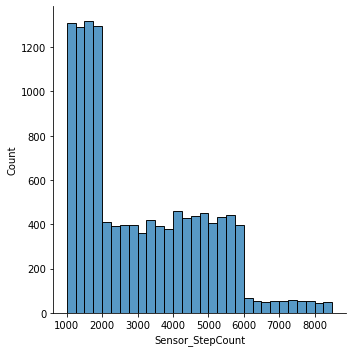

In [40]:
# Revisamos la distribucion de 'Sensor_StepCount'
plt.figure(figsize=[10,4])
sns.displot(x=ds1['Sensor_StepCount'])

<Figure size 720x288 with 0 Axes>

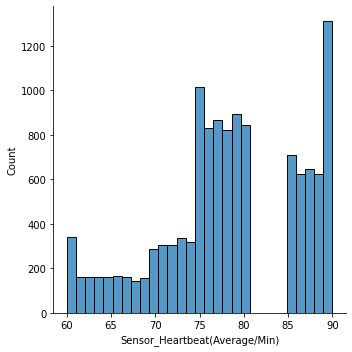

In [95]:
# Revisamos la distribucion de 'Sensor_Heartbeat(Average/Min')
plt.figure(figsize=[10,4])
sns.displot(x=ds1['Sensor_Heartbeat(Average/Min)'])

<Figure size 720x288 with 0 Axes>

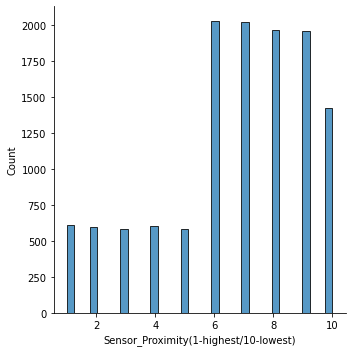

In [96]:
# Revisamos la distribucion de 'Sensor_Proximity(1-highest/10-lowest)'
plt.figure(figsize=[10,4])
sns.displot(x=ds1['Sensor_Proximity(1-highest/10-lowest)'])

<Figure size 720x288 with 0 Axes>

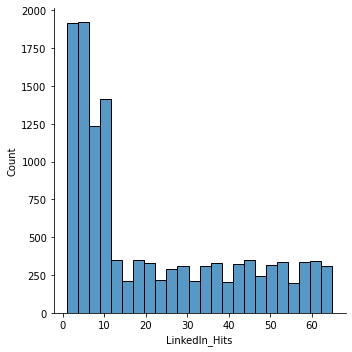

In [97]:
# Revisamos la distribucion de 'LinkedIn_Hits'
plt.figure(figsize=[10,4])
sns.displot(x=ds1['LinkedIn_Hits'])

In [98]:
seleccion1=['Sensor_StepCount']
ds2=ds1[seleccion1]
seleccion2=['Sensor_Heartbeat(Average/Min)', 'Sensor_Proximity(1-highest/10-lowest)', 'LinkedIn_Hits']
ds3=ds1[seleccion2]

<Axes: >

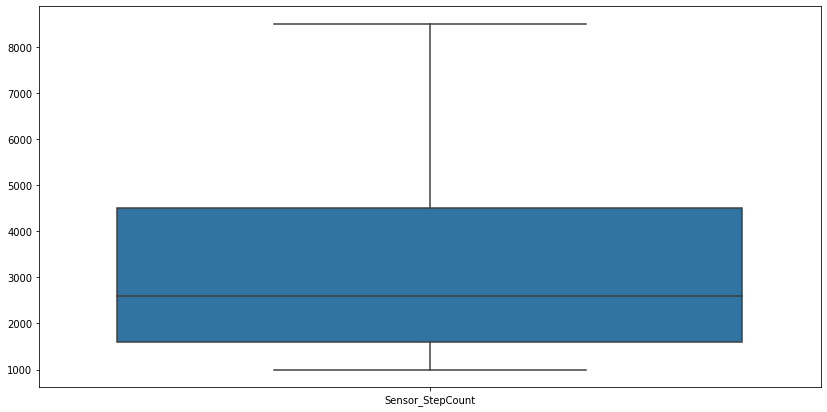

In [99]:
plt.figure(figsize = [14,7])
sns.boxplot(data = ds2)

<Axes: >

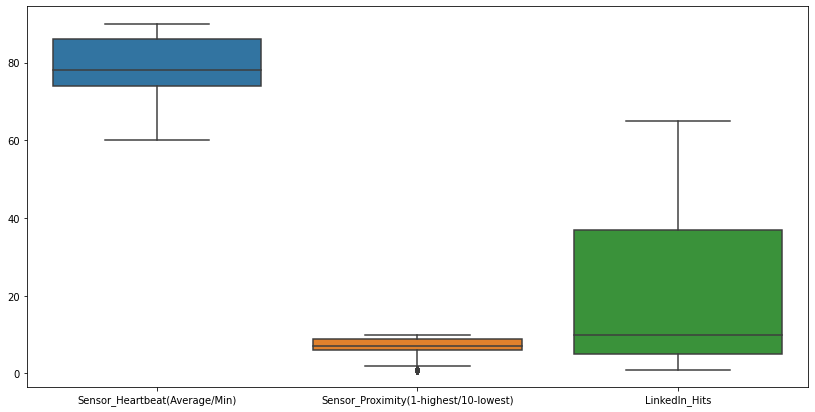

In [100]:
plt.figure(figsize = [14,7])
sns.boxplot(data = ds3)

In [105]:
# Definimos la función.
def detect_outliers(col):

    outliers  = []
    threshold = 3
    mean = np.mean(col)
    std = np.std(col)

    for i in col:
      z_score = (i - mean) / std
      if np.abs(z_score) > threshold:
        outliers.append(i)
    return outliers

In [106]:
#Identificamo outliers en 'Sensor_StepCount', pero no realizamos acciones debido a que no son significativos para el caso de estudio.
detect_outliers(ds1['Sensor_StepCount'])

[8473,
 8473,
 8500,
 8445,
 8403,
 8393,
 8440,
 8422,
 8398,
 8344,
 8349,
 8430,
 8386,
 8441,
 8495,
 8365,
 8464,
 8377,
 8396,
 8349,
 8368,
 8385,
 8375,
 8352,
 8468,
 8381,
 8390,
 8422,
 8394,
 8355,
 8431,
 8367,
 8392,
 8391,
 8403,
 8440]

In [109]:
# Generamos un Dataset con los campos mas relevantes
seleccion3=['EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3', 'EMP_Engagement_4','EMP_Engagement_5', 'Percent_Remote']
ds4=ds1[seleccion3]

In [110]:
# Revisamos las estadísticas de los campos mas relevantes
ds4.describe()

,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,Percent_Remote
count,12355.000000,12355.000000,12355.000000,12355.000000,12355.000000,12355.000000
mean,3.869122,4.151841,3.717280,3.434561,2.434561,0.580121
std,1.801358,1.351018,0.450339,0.900679,0.900679,0.192177
min,1.000000,2.000000,3.000000,2.000000,1.000000,0.400000
25%,1.000000,2.000000,3.000000,2.000000,1.000000,0.400000
50%,5.000000,5.000000,4.000000,4.000000,3.000000,0.500000
75%,5.000000,5.000000,4.000000,4.000000,3.000000,0.800000
max,5.000000,5.000000,4.000000,4.000000,3.000000,0.800000
